In [ ]:
import numpy as np  #for mathematical operations
import os  # for accessing the system files
import cv2 # for reading the image inside the folders
import matplotlib.pyplot as plt # for plotting
from sklearn import metrics  # used for measure performance of model
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, f1_score
import random # generating random number
from tensorflow.keras.preprocessing import image # for performing operations on the image

In [8]:
train_path = "D://SEM - 3//PML//FINAL PROJECT//KNN//training_set"  # path for our dataset

In [9]:
emojis = os.listdir(train_path) 
emojis

['cats', 'dogs']

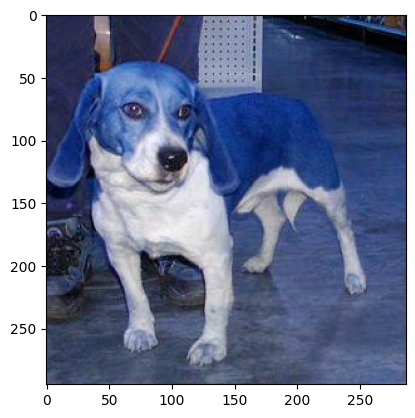

In [10]:
X1 = [] # list to store our images
y1 = [] # list to store class labels
    
for i1 in emojis:
    p = os.path.join(train_path,i1)
    for j1 in os.listdir(p):
        img2 = cv2.imread(os.path.join(p,j1))
        X1.append(img2)
        y1.append(emojis.index(i1))

# randomly selects an image from the dataset
idx = random.randint(0,len(X1))
plt.imshow(X1[idx])

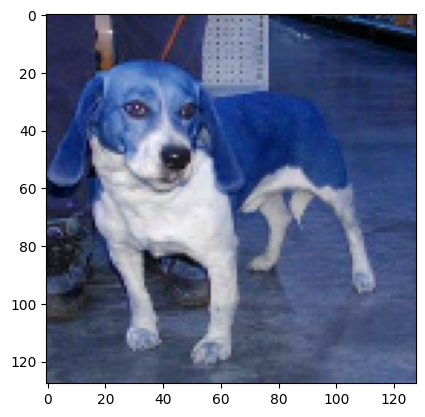

In [11]:
X = []
y = []
    
for i in emojis:
    path2 = os.path.join(train_path,i)
    for j in os.listdir(path2):
        img1 = cv2.imread(os.path.join(path2,j))
        img = cv2.resize(img1,(128,128))  # resizing the image to 128 x 128 size
        X.append(img)
        y.append(emojis.index(i))

plt.imshow(X[idx])

In [12]:
# converting the lists into arrays

X = np.array(X) 
y = np.array(y)

X

array([[[[218, 218, 218],
         [215, 215, 215],
         [225, 225, 225],
         ...,
         [205, 213, 212],
         [212, 223, 221],
         [214, 225, 223]],

        [[213, 213, 213],
         [216, 216, 216],
         [223, 223, 223],
         ...,
         [209, 217, 216],
         [209, 220, 218],
         [216, 227, 225]],

        [[220, 220, 220],
         [219, 219, 219],
         [221, 221, 221],
         ...,
         [211, 219, 218],
         [213, 224, 222],
         [210, 221, 219]],

        ...,

        [[ 63,  43, 177],
         [ 48,  26, 167],
         [ 46,  20, 171],
         ...,
         [  0,   2,   9],
         [  1,   1,   9],
         [  8,  10,  18]],

        [[ 59,  24, 232],
         [ 48,  13, 221],
         [ 56,  20, 229],
         ...,
         [  5,   7,  15],
         [  0,   2,   9],
         [  3,   5,  13]],

        [[ 66,  22, 242],
         [ 57,  12, 233],
         [ 63,  19, 239],
         ...,
         [  0,   0,   6],
        

In [13]:
X_scale = X/255.0 # scaling the pixels
X_scale

array([[[[0.85490196, 0.85490196, 0.85490196],
         [0.84313725, 0.84313725, 0.84313725],
         [0.88235294, 0.88235294, 0.88235294],
         ...,
         [0.80392157, 0.83529412, 0.83137255],
         [0.83137255, 0.8745098 , 0.86666667],
         [0.83921569, 0.88235294, 0.8745098 ]],

        [[0.83529412, 0.83529412, 0.83529412],
         [0.84705882, 0.84705882, 0.84705882],
         [0.8745098 , 0.8745098 , 0.8745098 ],
         ...,
         [0.81960784, 0.85098039, 0.84705882],
         [0.81960784, 0.8627451 , 0.85490196],
         [0.84705882, 0.89019608, 0.88235294]],

        [[0.8627451 , 0.8627451 , 0.8627451 ],
         [0.85882353, 0.85882353, 0.85882353],
         [0.86666667, 0.86666667, 0.86666667],
         ...,
         [0.82745098, 0.85882353, 0.85490196],
         [0.83529412, 0.87843137, 0.87058824],
         [0.82352941, 0.86666667, 0.85882353]],

        ...,

        [[0.24705882, 0.16862745, 0.69411765],
         [0.18823529, 0.10196078, 0.65490196]

In [14]:
print(len(X_scale))
print(len(y))

5000
5000


In [15]:
from sklearn.model_selection import train_test_split
    
[X_train,X_test,y_train,y_test] = train_test_split(X_scale,y,random_state =25)

In [16]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3750, 128, 128, 3)
(3750,)
(1250, 128, 128, 3)
(1250,)


In [34]:
# reshaping the training and testing data

X_train_knn = np.reshape(X_train,(len(X_train),-1))
X_test_knn = np.reshape(X_test,(len(X_test),-1))

X_train_knn

array([[0.06666667, 0.01176471, 0.17647059, ..., 0.00392157, 0.00392157,
        0.02745098],
       [0.34117647, 0.69411765, 0.66666667, ..., 0.22352941, 0.23137255,
        0.23529412],
       [0.32941176, 0.38039216, 0.45882353, ..., 0.65490196, 0.70980392,
        0.8       ],
       ...,
       [1.        , 1.        , 1.        , ..., 0.30588235, 0.34117647,
        0.42745098],
       [0.43529412, 0.49411765, 0.45098039, ..., 0.07843137, 0.08627451,
        0.07058824],
       [0.4627451 , 0.50980392, 0.54509804, ..., 0.63137255, 0.66666667,
        0.70196078]])

In [20]:
print(X_train_knn.shape)
print(X_test_knn.shape)

(3750, 49152)
(1250, 49152)


In [21]:
from collections import Counter
import numpy as np

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)
    
    def _predict(self, x):

        # Compute distances between x and all data points inn training data
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]

        # Sort by distance and return indices of the first k neighbors
        k_idx = np.argsort(distances)[: self.k]

        # Extract the labels of the k nearest neighbor training samples
        k_neighbor_labels = [self.y_train[i] for i in k_idx]
        
        # return the most common class label
        most_common = Counter(k_neighbor_labels).most_common(1)
        return most_common[0][0]

In [22]:
k=5
clf = KNN(k=k)
clf.fit(X_train_knn, y_train)
predictions = clf.predict(X_test_knn)

print(accuracy_score(predictions,y_test)*100)
print(classification_report(predictions,y_test))

54.559999999999995
              precision    recall  f1-score   support

           0       0.69      0.54      0.60       809
           1       0.40      0.56      0.47       441

    accuracy                           0.55      1250
   macro avg       0.55      0.55      0.54      1250
weighted avg       0.59      0.55      0.56      1250



In [ ]:
"""from sklearn.metrics import mean_squared_error
from math import sqrt

train_preds = clf.predict(X_train_knn)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse"""

***INBUILT COMMAND IMPLEMENTATION***


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_knn,y_train)
y_pred = model.predict(X_test_knn)

print(accuracy_score(y_pred,y_test)*100)
print(classification_report(y_pred,y_test))

In [ ]:
print(confusion_matrix(y_pred,y_test))

(128, 128)


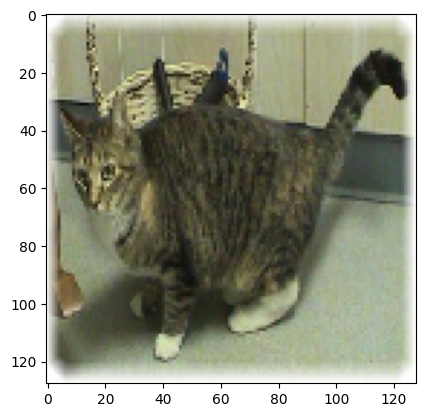

In [29]:
t_path = "D://SEM - 3//PML//FINAL PROJECT//KNN//test_set//cats//cat.4027.jpg"
                
img = image.load_img(t_path, target_size=(128,128))
img_array = image.img_to_array(img)
img_scaled = np.reshape(img_array,(img_array.size,-1))

plt.imshow(img)
plt.show
print(img.size)

In [30]:
img_scaled  = img_scaled/255.0
print(img_scaled.shape)

(49152, 1)


In [ ]:
pred = clf.predict(img_scaled)
pred